#Dimensionality Reduction -- Data Set: Breast Cancer Data Set 

In [1]:
#importing Libraries 
import os 
os.chdir ('C:\\Users\\User\\Documents\\PYTHON\Works\\4. Dimensional Reduction')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# Check the data , there should be no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
feature_names = np.array(['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'])

#### Convert diagnosis column to 1/0 and store in new column target


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# # Encode label diagnosis
# # M -> 1
# # B -> 0

In [8]:
# Get All rows, but only last column
target_data=df["diagnosis"]

encoder = LabelEncoder()
target_data = encoder.fit_transform(target_data)

#### Store the encoded column in dataframe and drop the diagnosis column for simpilcity

In [9]:
df.drop(["diagnosis"],axis = 1, inplace = True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data = scaler.transform(df)

In [13]:
#APPLYING THE PCA 

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=10)

In [16]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
#data Transformation 

In [18]:
x_pca = pca.transform(scaled_data)

In [19]:
scaled_data.shape

(569, 31)

In [20]:
x_pca.shape

(569, 10)

Text(0, 0.5, 'Second Principal Component')

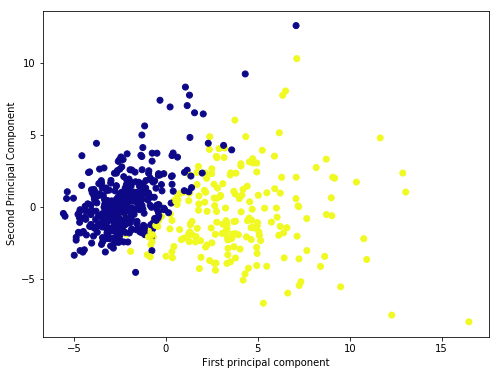

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target_data,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [22]:
#PCA COMPONENT

In [23]:
pca.components_

array([[ 2.29121629e-02,  2.18913018e-01,  1.03843884e-01,
         2.27534912e-01,  2.21045775e-01,  1.42414707e-01,
         2.39067299e-01,  2.58280254e-01,  2.60738114e-01,
         1.37977741e-01,  6.41477914e-02,  2.06117467e-01,
         1.74133924e-02,  2.11446519e-01,  2.03076420e-01,
         1.46782103e-02,  1.70288397e-01,  1.53543673e-01,
         1.83406751e-01,  4.24155186e-02,  1.02496073e-01,
         2.28009352e-01,  1.04515447e-01,  2.36637339e-01,
         2.24932135e-01,  1.27824406e-01,  2.09884561e-01,
         2.28602175e-01,  2.50746203e-01,  1.22679932e-01,
         1.31560243e-01],
       [-3.40684907e-02, -2.33271401e-01, -6.00441986e-02,
        -2.14589002e-01, -2.30668816e-01,  1.86422211e-01,
         1.52454726e-01,  6.05416253e-02, -3.41673916e-02,
         1.90684979e-01,  3.66531055e-01, -1.05935702e-01,
         8.95477887e-02, -8.98070428e-02, -1.52771289e-01,
         2.03189876e-01,  2.32503362e-01,  1.96846081e-01,
         1.29965181e-01,  1.83

In [24]:
#Variance (HOW MUCH INFORMATION WAS LOST IN RATIO WITHIN THE 10 FEATURES SELECTED)

In [25]:
pca.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945, 0.01486427, 0.01300429])

In [ ]:
##APPLYING FEATURE IMPORTANCE **

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df,target_data)

In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)

In [28]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


In [29]:
featureScores

,Specs,Score
0,id,4.622948e+08
1,radius_mean,2.661049e+02
2,texture_mean,9.389751e+01
3,perimeter_mean,2.011103e+03
4,area_mean,5.399166e+04
5,smoothness_mean,1.498993e-01
6,compactness_mean,5.403075e+00
7,concavity_mean,1.971235e+01
8,concave points_mean,1.054404e+01
9,symmetry_mean,2.573798e-01


In [30]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
0                id  4.622948e+08
24       area_worst  1.125984e+05
4         area_mean  5.399166e+04
14          area_se  8.758505e+03
23  perimeter_worst  3.665035e+03
3    perimeter_mean  2.011103e+03
21     radius_worst  4.916892e+02
1       radius_mean  2.661049e+02
13     perimeter_se  2.505719e+02
22    texture_worst  1.744494e+02


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(df,target_data)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00699821 0.04985306 0.01392265 0.01270667 0.05137982 0.01676397
 0.01271647 0.03974487 0.06539411 0.00596145 0.00790696 0.0170722
 0.00540751 0.02214032 0.05798322 0.00702398 0.00631559 0.00785361
 0.00672444 0.005176   0.00669317 0.11332069 0.01795812 0.15485742
 0.07354308 0.0196852  0.01102786 0.04745444 0.11097177 0.01347458
 0.01196856]


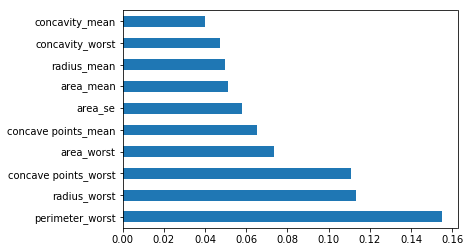

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [34]:
#checking the accurancy of the model 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test, target_data_train, target_data_test = train_test_split( df, target_data, test_size=0.2)

In [37]:
len(df_test)

114

In [38]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(df_train, target_data_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lg.predict(df_test)

array([ 0.76027672,  1.08156261,  0.08120072,  0.110383  ,  0.18395742,
        0.2277259 ,  0.44201633,  1.17867092,  0.04395041,  0.17629652,
        0.22790649,  0.98032046,  0.12934691,  0.02816171,  0.03961023,
        0.08661881,  0.72531281, -0.29550925,  0.20577127,  1.09655052,
        0.76202366,  0.22817711,  0.3544583 ,  0.03907882,  0.19968293,
        0.16120892,  0.167153  ,  0.13386017,  0.10341698,  0.03981442,
        0.81479408,  0.80729077, -0.02139811,  0.07521779,  0.04268532,
        0.0556754 ,  0.655518  ,  1.20532064,  0.75060577,  0.04407108,
        0.5622444 ,  0.93216219,  0.04448296, -0.0166669 , -0.06586743,
        1.02521277,  0.91680575,  0.3719755 , -0.07598883,  0.78721075,
        0.21008933, -0.02492117, -0.04048005,  1.10451494, -0.04894729,
       -0.00449656,  0.11408033,  0.26502097, -0.16694172,  0.07365893,
        0.67353331,  0.41310125,  0.23368028, -0.04946053,  0.91475088,
        0.3511786 ,  0.29744074,  0.52302243,  1.1629744 ,  0.31

In [40]:
lg.score(df_test, target_data_test)

0.7108312049769481

In [41]:
#DECISION TREE 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(df_train,target_data_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
dtree.score(df_test, target_data_test)

0.9649122807017544

In [ ]:
#RANDOM FOREST TREE

In [43]:
from sklearn.model_selection import train_test_split
df_train, df_test, target_data_train, target_data_test = train_test_split(df,target_data,test_size=0.3)

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(df_train, target_data_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
model.score(df_train, target_data_train)

0.9974874371859297

In [ ]:
#HEATMAP 

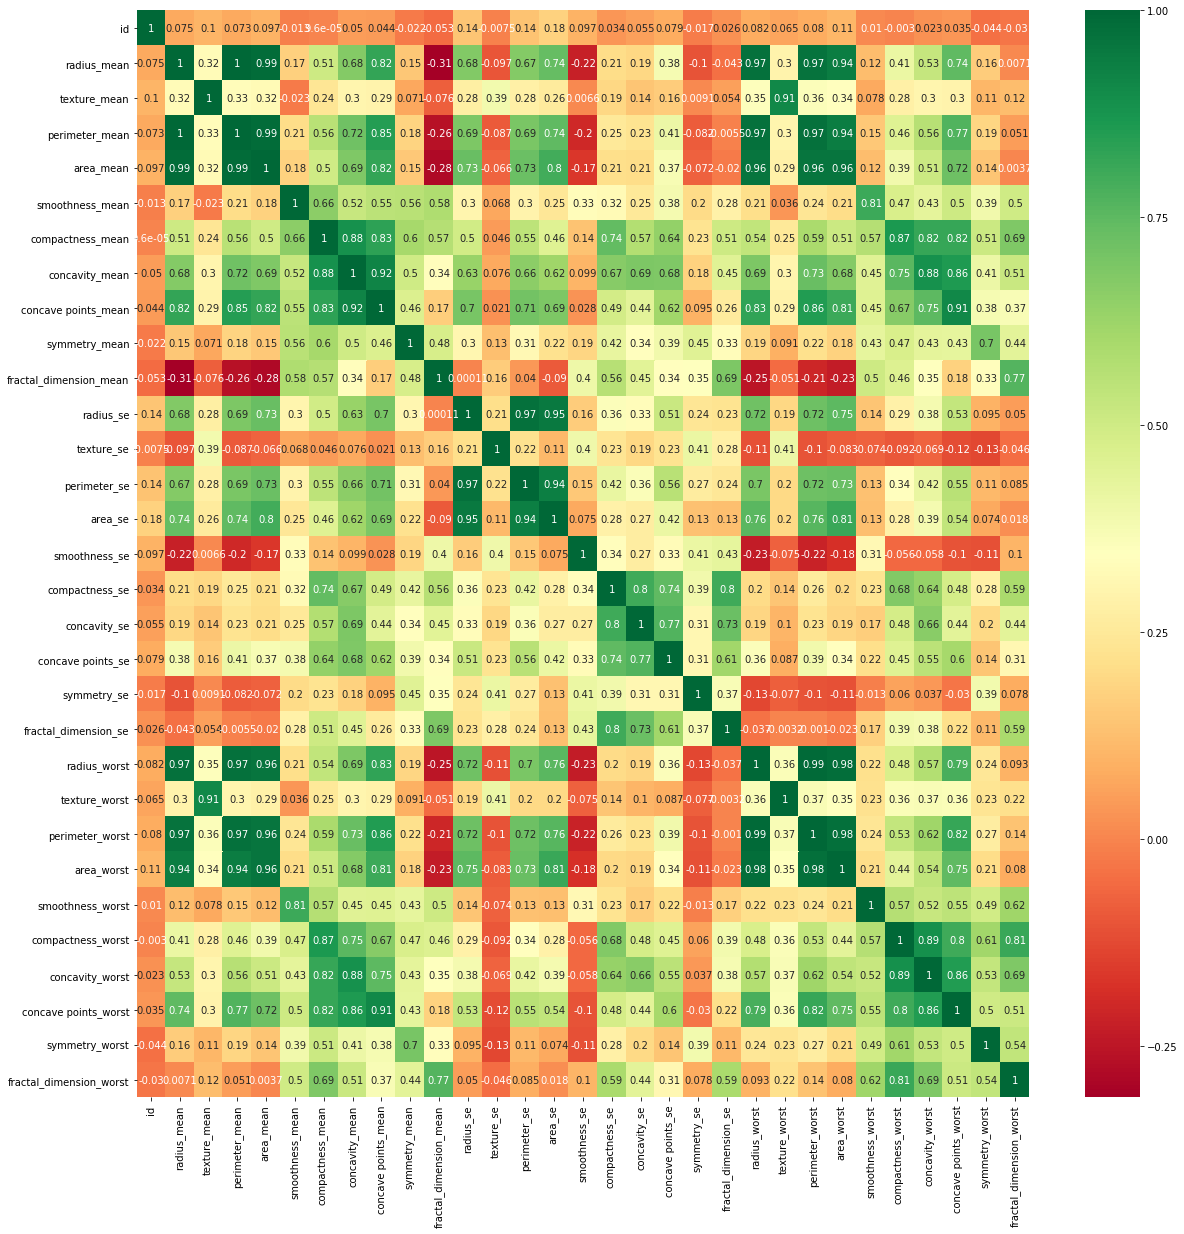

In [46]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [47]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
